### Experimenting five datasets 
* daily-minimum-temperatures.csv
* daily-total-female-births.csv
* shampoo-sales.csv
* sunspots.csv
* airline-passengers.csv

### Load and Explore Time Series Data

In [1]:
# load dataset using read_csv() 
from pandas import read_csv

A series is a one dimensional array with a time label for each row. We load the time series as a Series object instead of a dataframe 

In [2]:
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True) 
print(type(series)) 
print(series.head())

<class 'pandas.core.series.Series'>
Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales, dtype: float64


1.  header=0: We must specify the header information at row 0.
2.  parse dates=True: We give the function a hint that data in the ﬁrst column contains dates that need to be parsed.
3.  index col=0: We hint that the ﬁrst column contains the index information for the time series.
4. squeeze=True: We hint that we only have one data column and that we are interested in a Series and not a DataFrame.


We use the head() function to peek at the first 5 records or specify the first n number of records to review. You can also use tail() to get the last n records of the dataset 

Number of observations is represented by the size 

In [3]:
series.size

36

Descriptive Statistics 

In [4]:
series.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

In [5]:
from matplotlib import pyplot
series.plot() 

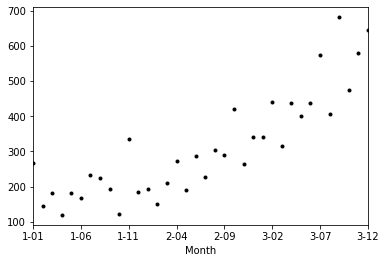

In [6]:
series.plot(style='k.')

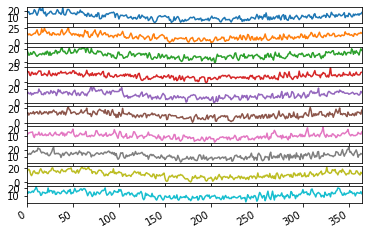

In [7]:
from pandas import Grouper
from pandas import DataFrame
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True) 
groups = series.groupby(Grouper(freq='A')) 
years = DataFrame() 
for name, group in groups: 
    years[name.year] = group.values 
years.plot(subplots=True, legend=False) 
pyplot.show()

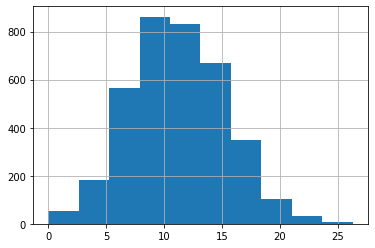

In [8]:
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True) 
series.hist() 
pyplot.show()

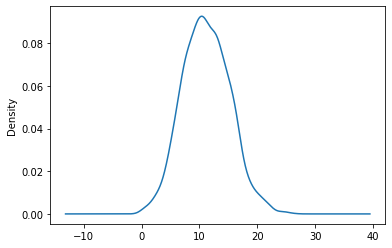

In [9]:
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True) 
series.plot(kind='kde') 
pyplot.show()

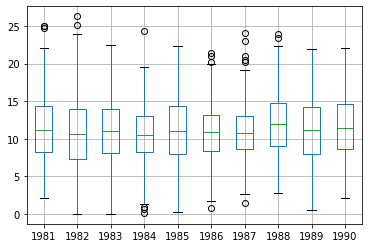

In [10]:
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True) 
groups = series.groupby(Grouper(freq='A')) 
years = DataFrame() 
for name, group in groups: 
    years[name.year] = group.values 
years.boxplot() 
pyplot.show()

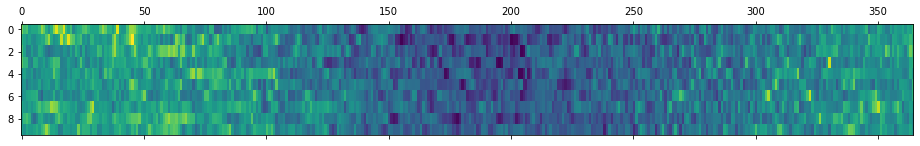

In [11]:
years = years.T 
pyplot.matshow(years, interpolation=None, aspect='auto') 
pyplot.show()

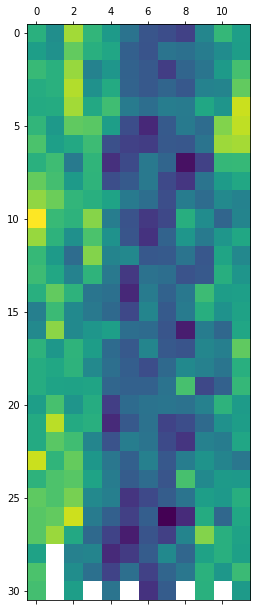

In [12]:
from pandas import concat 
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True) 
one_year = series['1990'] 
groups = one_year.groupby(Grouper(freq='M')) 
months = concat([DataFrame(x[1].values) for x in groups], axis=1) 
months = DataFrame(months) 
months.columns = range(1,13) 
pyplot.matshow(months, interpolation=None, aspect='auto') 
pyplot.show()

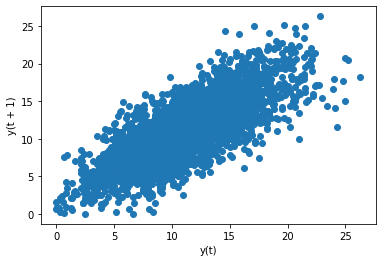

In [13]:
from pandas.plotting import lag_plot 
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True) 
lag_plot(series) 
pyplot.show()

c:\programdata\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\programdata\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
c:\programdata\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Wed, 12 Jun 2019   AIC                            406.340
Time:                        13:09:48   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

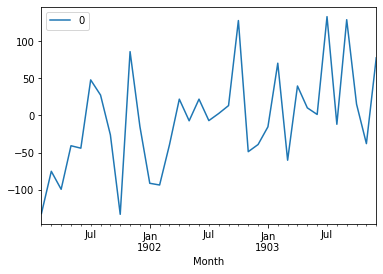

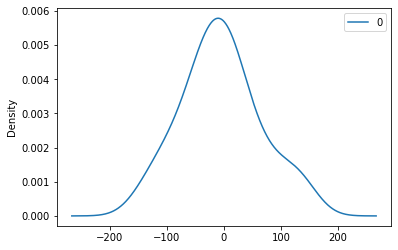

                0
count   35.000000
mean    -5.495215
std     68.132882
min   -133.296619
25%    -42.477920
50%     -7.186571
75%     24.748340
max    133.237965


In [14]:
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
# load dataset 
def parser(x): 
    return datetime.strptime('190'+x, '%Y-%m') 
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser) 
# fit model 
model = ARIMA(series, order=(5,1,0)) 
model_fit = model.fit(disp=0) 
# summary of fit model 
print(model_fit.summary()) 
# line plot of residuals 
residuals = DataFrame(model_fit.resid) 
residuals.plot() 
pyplot.show() 
# density plot of residuals 
residuals.plot(kind='kde') 
pyplot.show() 
# summary stats of residuals 
print(residuals.describe())

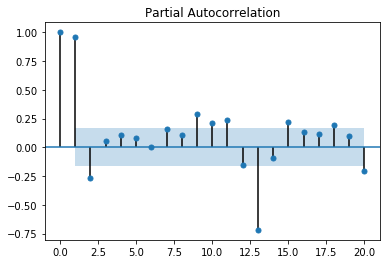

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf 
from statsmodels.graphics.tsaplots import plot_acf 
plot_pacf(series, lags= 20, alpha=0.05) 
pyplot.show()

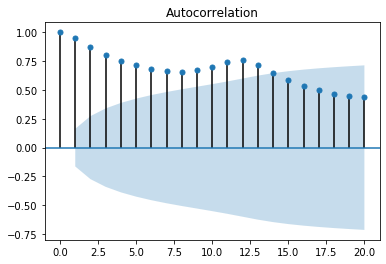

In [25]:
plot_acf(series, lags= 20, alpha=0.05) 
pyplot.show()

In [28]:
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

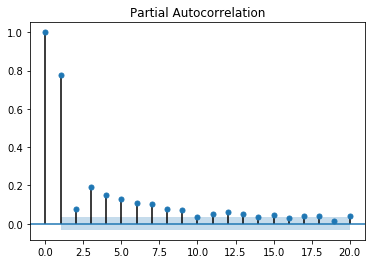

In [29]:
plot_pacf(series, lags= 20, alpha=0.05) 
pyplot.show()

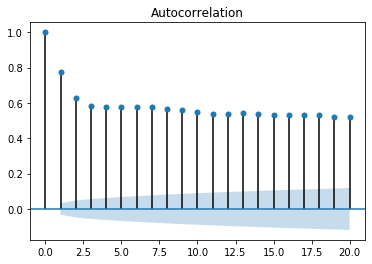

In [30]:
plot_acf(series, lags= 20, alpha=0.05) 
pyplot.show()

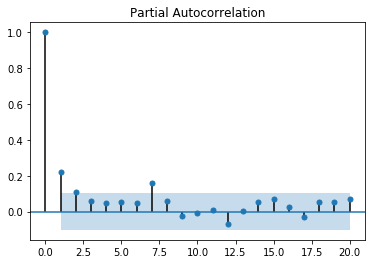

In [31]:
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
plot_pacf(series, lags= 20, alpha=0.05) 
pyplot.show()

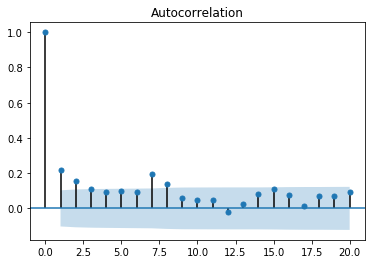

In [32]:
plot_acf(series, lags= 20, alpha=0.05) 
pyplot.show()

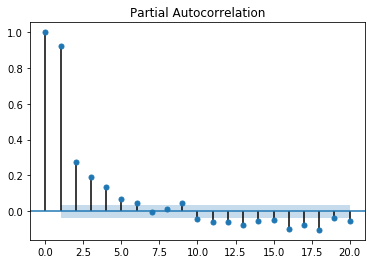

In [33]:
series = read_csv('sunspots.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
plot_pacf(series, lags= 20, alpha=0.05) 
pyplot.show()

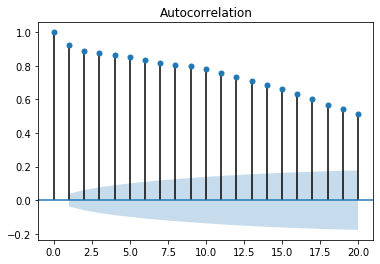

In [34]:
plot_acf(series, lags= 20, alpha=0.05) 
pyplot.show()

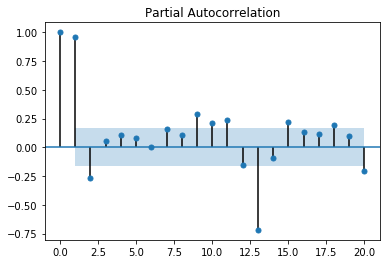

In [35]:
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
plot_pacf(series, lags= 20, alpha=0.05) 
pyplot.show()

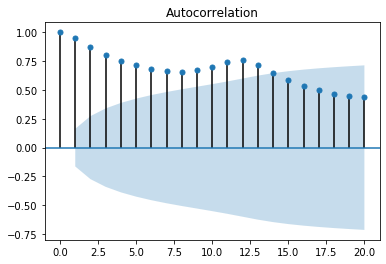

In [36]:
plot_acf(series, lags= 20, alpha=0.05) 
pyplot.show()

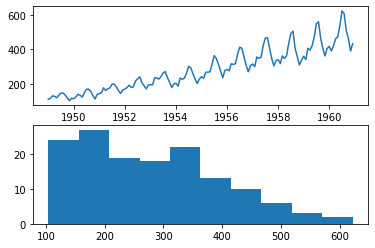

In [15]:
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True) 
pyplot.figure(1) 
# line plot 
pyplot.subplot(211) 
pyplot.plot(series) 
# histogram 
pyplot.subplot(212) 
pyplot.hist(series) 
pyplot.show()

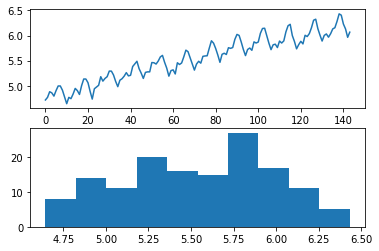

In [19]:
from numpy import log 
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataframe = DataFrame(series.values) 
dataframe.columns = ['passengers'] 
dataframe['passengers'] = log(dataframe['passengers']) 
pyplot.figure(1) 
# line plot 
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram 
pyplot.subplot(212) 
pyplot.hist(dataframe['passengers']) 
pyplot.show()